In [1]:
import import_ipynb
from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from aqi_epa_pm25.ipynb
PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_2BBA    float64
TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_1EE6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 09:00:30-05:00,9.0,17.0,NaN,11.0,16.0,13.0,11.0,11.0,11.0,14.0,9.0,19.0,0.0
2023-10-05 09:01:00-05:00,8.0,17.0,NaN,11.0,16.0,10.0,11.0,11.0,11.0,NaN,11.0,17.0,0.0
2023-10-05 09:01:30-05:00,8.0,18.0,NaN,13.0,16.0,12.0,11.0,11.0,10.0,11.0,11.0,19.0,0.0
2023-10-05 09:02:00-05:00,8.0,17.0,NaN,12.0,15.0,14.0,10.0,12.0,11.0,10.0,11.0,18.0,0.0
2023-10-05 09:02:30-05:00,10.0,19.0,NaN,11.0,16.0,15.0,11.0,15.0,10.0,9.0,11.0,18.0,0.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,1357.000000,1357.000000,1222.000000,1270.000000,1334.000000,1250.000000,1333.000000,1286.000000,1303.000000,1310.000000,1339.000000,1337.000000,1360.0
mean,5.799558,7.803979,8.461538,16.456693,7.110945,8.733600,6.730683,8.503888,8.698388,5.951908,8.353996,7.264024,0.0
std,2.743386,4.207720,3.274963,9.654926,4.403979,4.642744,3.748304,3.188193,3.668321,3.216408,5.558374,3.921364,0.0
min,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,2.000000,0.0
25%,3.000000,4.000000,6.000000,10.000000,3.000000,4.000000,3.000000,6.000000,6.000000,3.000000,3.000000,4.000000,0.0
50%,6.000000,6.000000,8.000000,15.000000,6.000000,9.000000,7.000000,9.000000,9.000000,6.000000,9.000000,6.000000,0.0
75%,8.000000,11.000000,11.000000,21.000000,11.000000,11.000000,10.000000,11.000000,11.000000,8.000000,12.000000,10.000000,0.0
max,15.000000,21.000000,18.000000,43.000000,19.000000,24.000000,20.000000,18.000000,18.000000,15.000000,24.000000,19.000000,0.0


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,,
2023-10-05 09:00:30-05:00,38.0,62.0,NaN,46.0,60.0,53.0,46.0,46.0,46.0,55.0,38.0,66.0,0.0
2023-10-05 09:01:00-05:00,34.0,62.0,NaN,46.0,60.0,42.0,46.0,46.0,46.0,NaN,46.0,62.0,0.0
2023-10-05 09:01:30-05:00,34.0,64.0,NaN,53.0,60.0,50.0,46.0,46.0,42.0,46.0,46.0,66.0,0.0
2023-10-05 09:02:00-05:00,34.0,62.0,NaN,50.0,58.0,55.0,42.0,50.0,46.0,42.0,46.0,64.0,0.0
2023-10-05 09:02:30-05:00,42.0,66.0,NaN,46.0,60.0,58.0,46.0,58.0,42.0,38.0,46.0,64.0,0.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_2BBA,TANGARA_260A,TANGARA_4B1A,TANGARA_1EE6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,1357.000000,1357.000000,1222.000000,1270.000000,1334.000000,1250.000000,1333.000000,1286.000000,1303.000000,1310.000000,1339.000000,1337.000000,1360.0
mean,24.560059,32.070744,35.087561,56.998425,29.524738,35.460800,28.190548,35.493002,35.900998,25.204580,33.554145,29.980553,0.0
std,11.306874,16.090251,12.599209,25.565442,17.321043,16.907902,14.814002,12.650262,13.808383,13.211079,20.153277,14.875720,0.0
min,9.000000,9.000000,13.000000,9.000000,5.000000,9.000000,9.000000,13.000000,13.000000,0.000000,0.000000,9.000000,0.0
25%,13.000000,17.000000,25.000000,42.000000,13.000000,17.000000,13.000000,25.000000,25.000000,13.000000,13.000000,17.000000,0.0
50%,25.000000,25.000000,34.000000,58.000000,25.000000,38.000000,30.000000,38.000000,38.000000,25.000000,38.000000,25.000000,0.0
75%,34.000000,46.000000,46.000000,70.000000,46.000000,46.000000,42.000000,46.000000,46.000000,34.000000,50.000000,42.000000,0.0
max,58.000000,70.000000,64.000000,120.000000,66.000000,77.000000,68.000000,64.000000,64.000000,58.000000,77.000000,66.000000,0.0


## Histograms

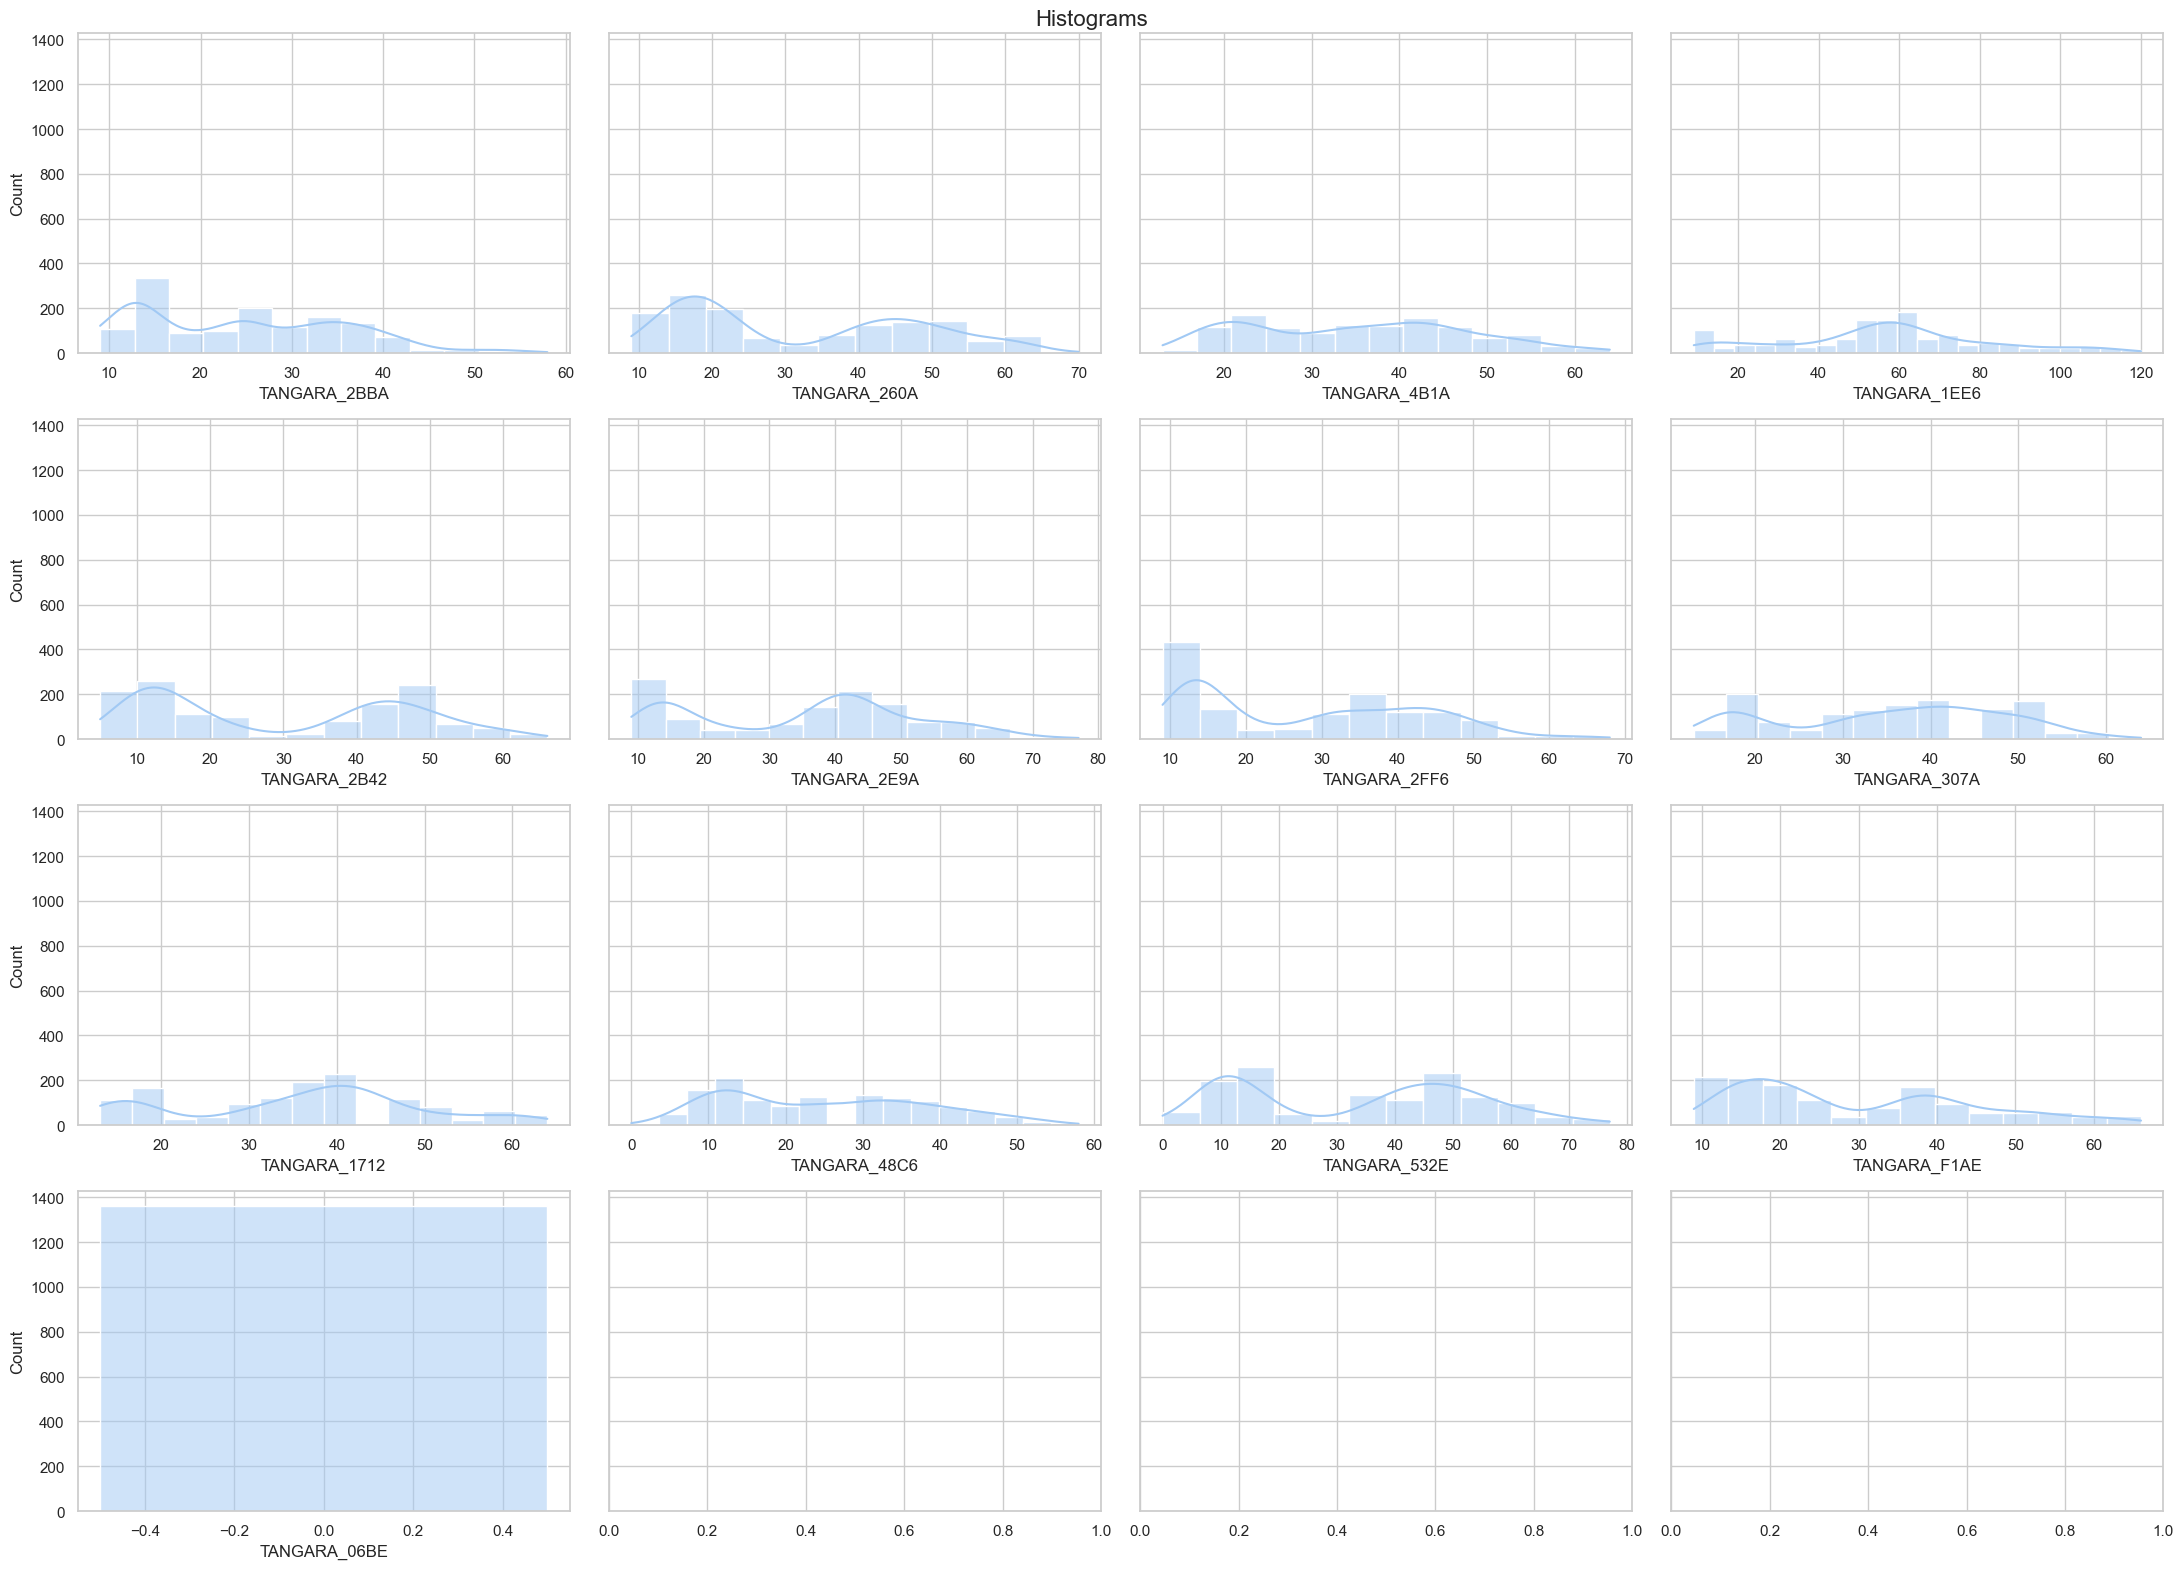

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

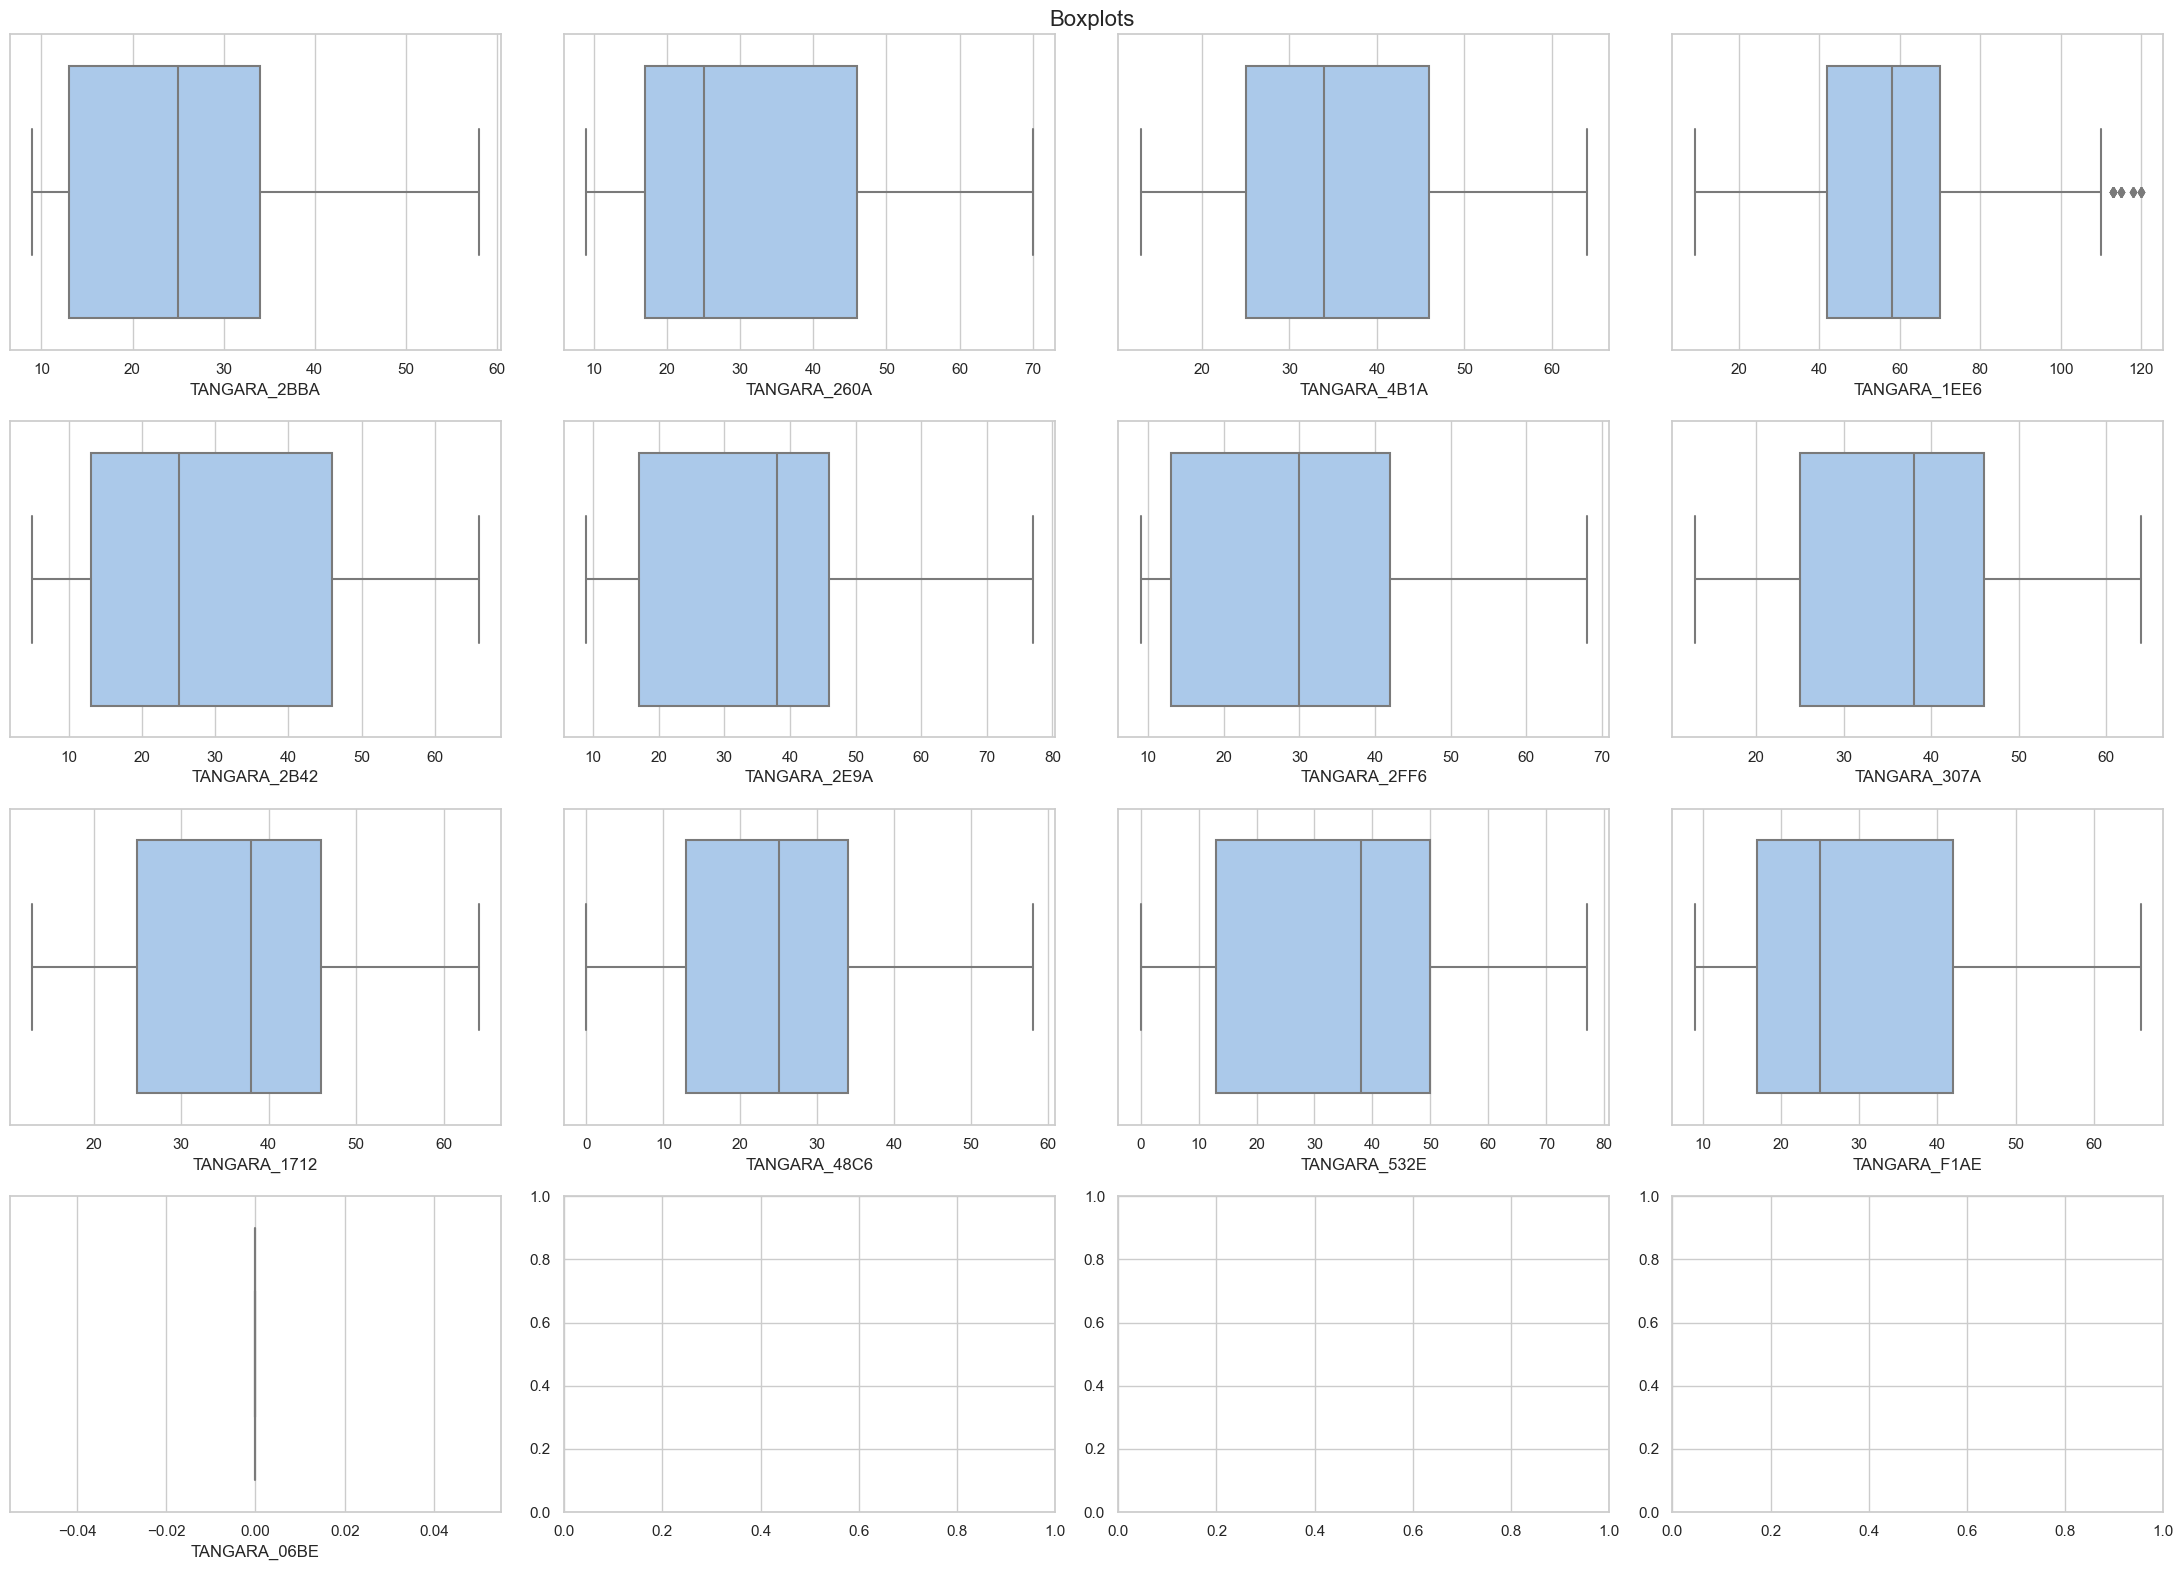

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

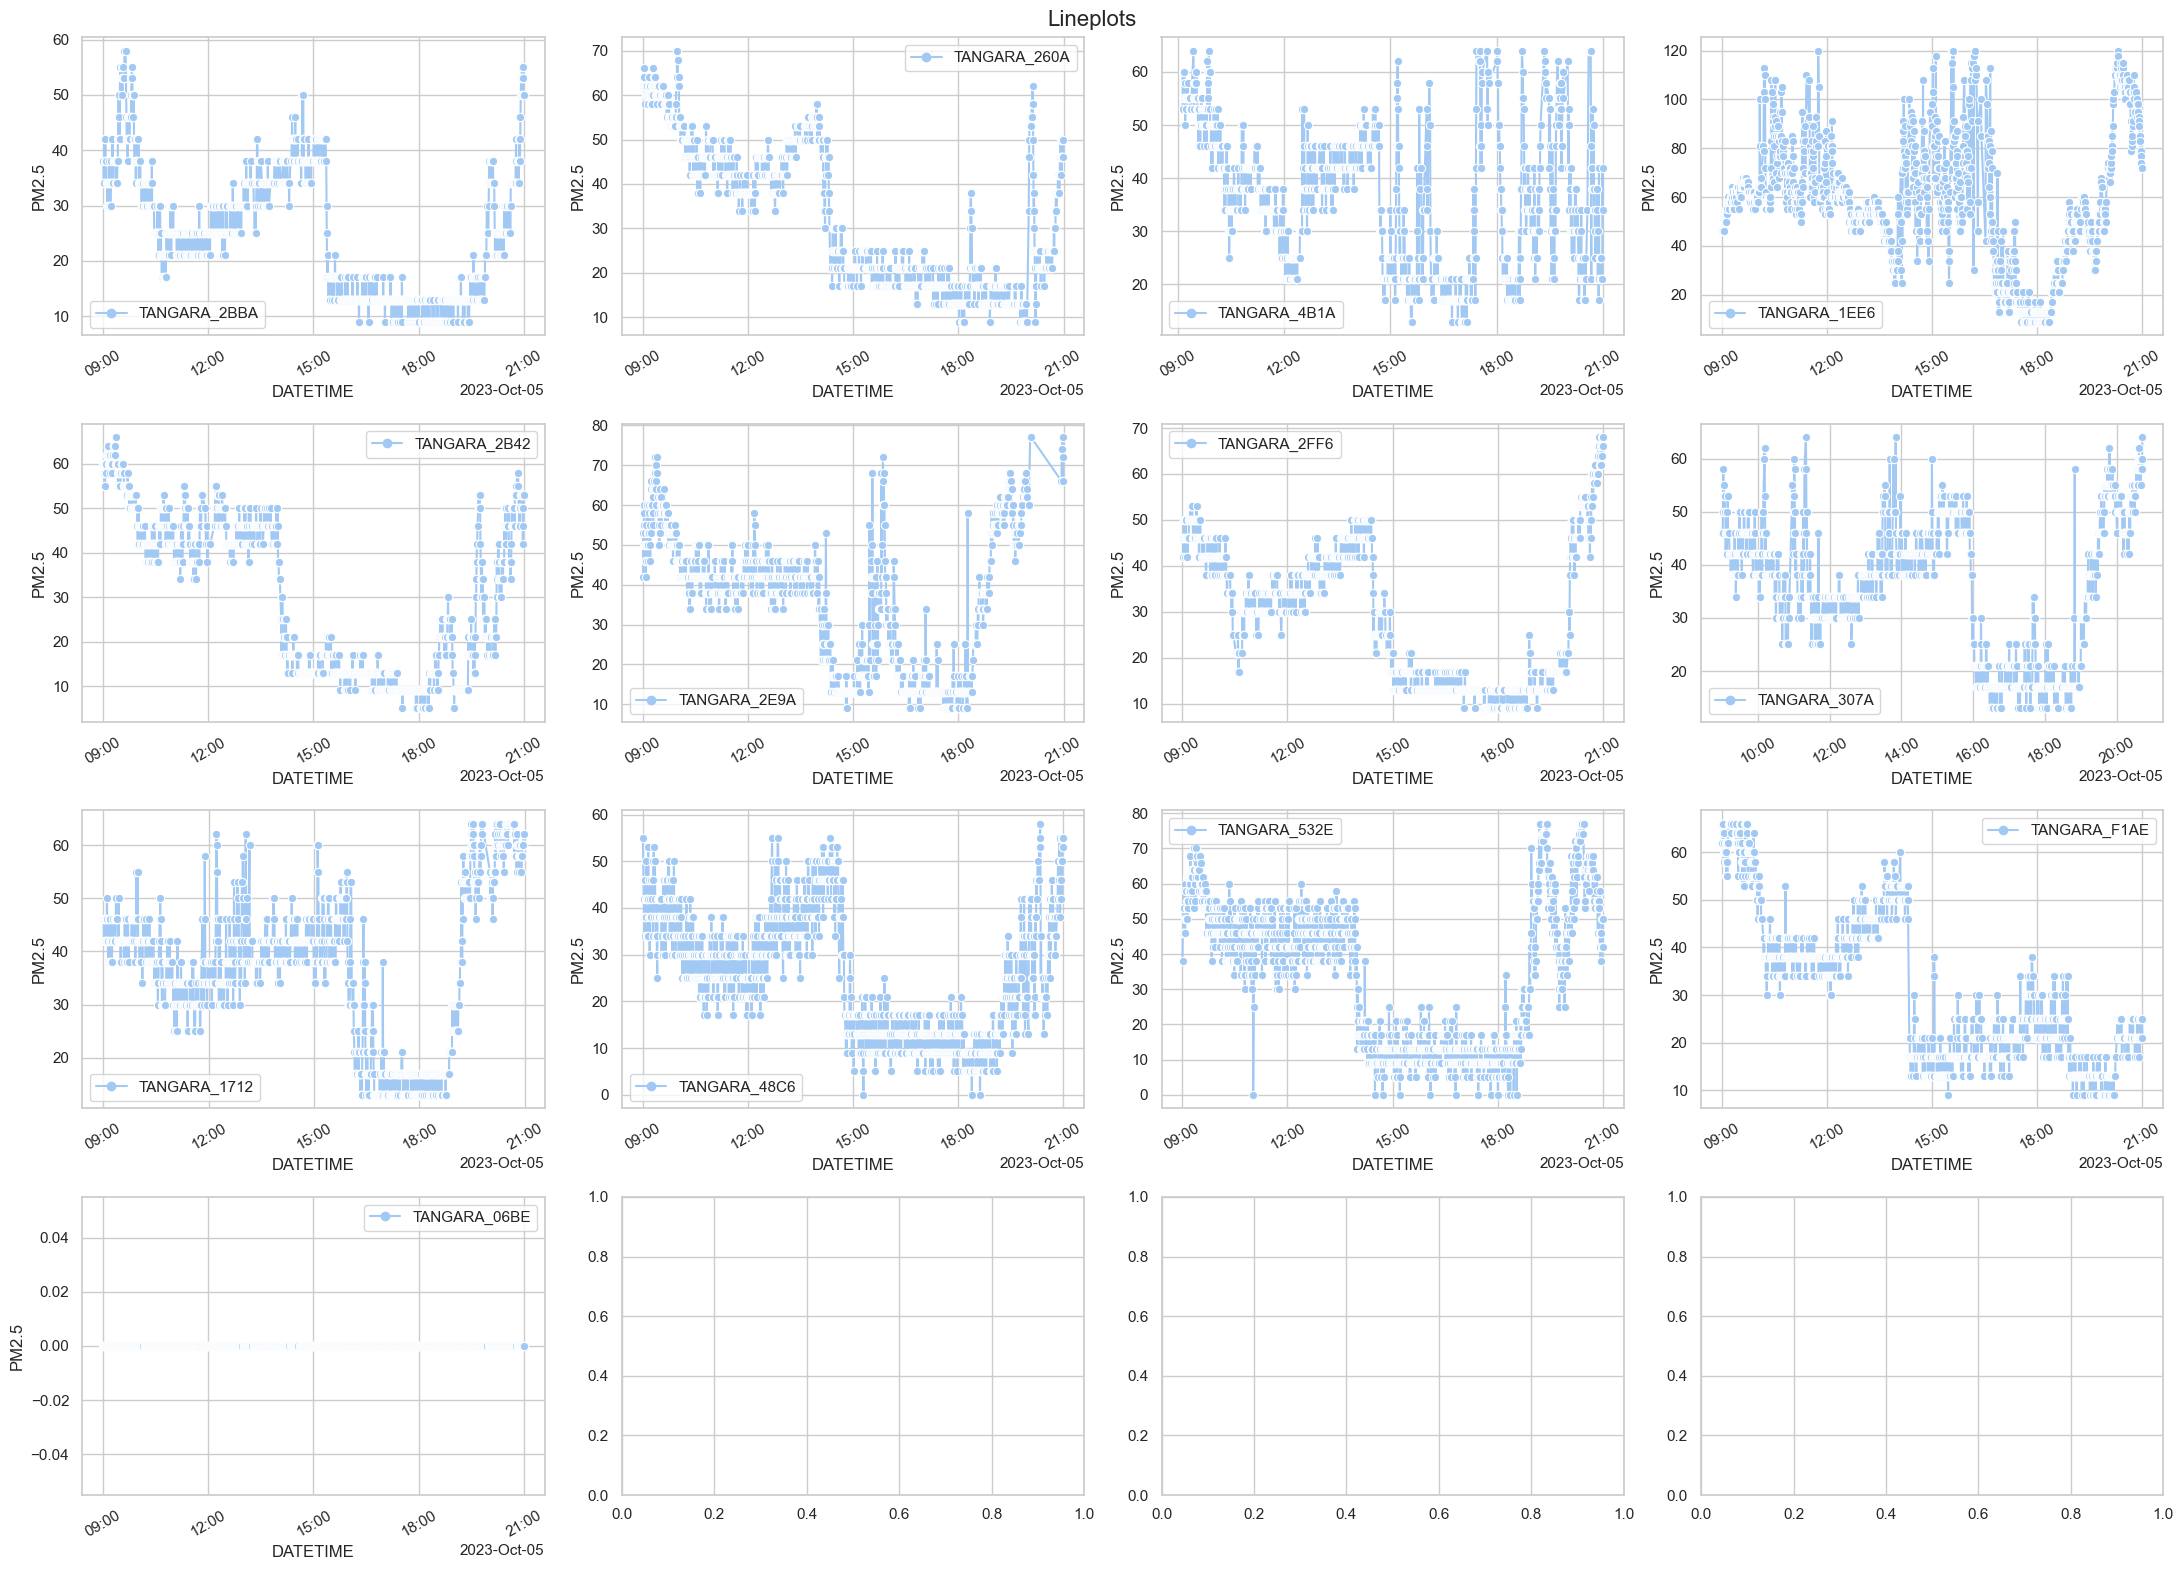

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')